# Python-Oracle Anbindung

## Benötigte Pakete:

   
    - Oracle-Pandas: 'pip install pandas-oracle', https://github.com/cwade/pandas_oracle
    - cx_Oracle: wird über pandas-oracle installiert
    - Seaborn, Pandas, Numpy, etc 


## HU-VPN  aktivieren oder in HU-Netzwerk (WLAN) einloggen.

Anleitungen:
https://www.cms.hu-berlin.de/de/dl/netze/vpn


## Verbindungsdaten: 
Die Verbindungsdaten werden in config.yml gespeichert. Die Datein *muss* im gleichen Ordner liegen.

In [1]:
import pandas_oracle.tools as pt
import numpy as np
import pandas as pd

# visualization
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

## Verbindungsaufbau:

In [2]:
def run_query(query):
    ## opening conn
    conn = pt.open_connection("config.yml")

    try:
        ## passing the conn object to the query_to_df
        df1 = pt.query_to_df(query, conn, 10000)
        return df1
    except Exception as e:
        print("An exception occurred")
        print(str(e))
    finally:
        ## close connection
        pt.close_connection(conn)

*Wichtig: die Verbindungs zur DB muss geschlossen werden, wenn ein Fehler auftritt.*

# 1. Beispielanfrage

In [3]:
query_all_tables = "SELECT table_name FROM all_tables WHERE owner = 'GROUP1'"
all_tables = run_query(query_all_tables)
all_tables

,TABLE_NAME
0,DELAYS
1,FLIGHT
2,AIRPORT
3,AIRLINE
4,TIME


In [4]:
query = "SELECT table_name, column_name, data_type, data_length FROM all_tab_columns WHERE table_name = 'DELAYS'"
flight_table = run_query(query)
flight_table

,TABLE_NAME,COLUMN_NAME,DATA_TYPE,DATA_LENGTH
0,DELAYS,ARRIVAL_TIME,NUMBER,22
1,DELAYS,DEPARTURE_TIME,NUMBER,22
2,DELAYS,ELAPSED_TIME,NUMBER,22
3,DELAYS,ARRIVAL_DELAY,NUMBER,22
4,DELAYS,YEAR,NUMBER,22
5,DELAYS,MONTH,NUMBER,22
6,DELAYS,DAY,NUMBER,22
7,DELAYS,CANCELLATION_REASON,VARCHAR2,1
8,DELAYS,DIVERTED,NUMBER,22
9,DELAYS,CANCELLED,NUMBER,22


In [34]:
query = "SELECT table_name, column_name, data_type, data_length FROM all_tab_columns WHERE table_name = 'FLIGHT'"
flight_table = run_query(query)
flight_table

,TABLE_NAME,COLUMN_NAME,DATA_TYPE,DATA_LENGTH
0,FLIGHT,DESTINATION_LONGITUDE,NUMBER,22
1,FLIGHT,DESTINATION_LATITUDE,NUMBER,22
2,FLIGHT,DESTINATION_COUNTRY,VARCHAR2,10
3,FLIGHT,DESTINATION_STATE,VARCHAR2,2
4,FLIGHT,DESTINATION_CITY,VARCHAR2,100
5,FLIGHT,DESTINATION_AIRPORT,VARCHAR2,100
6,FLIGHT,DESTINATION_IATA,VARCHAR2,3
7,FLIGHT,ORIGIN_LONGITUDE,NUMBER,22
8,FLIGHT,ORIGIN_LATITUDE,NUMBER,22
9,FLIGHT,ORIGIN_COUNTRY,VARCHAR2,10


In [84]:
query = """\
    SELECT * FROM delays FETCH FIRST 10 ROWS ONLY
    """

delays_table = run_query(query)
delays_table

,ID,FLIGHT_ID,DEPARTURE_DELAY,TAXI_OUT,TAXI_IN,WHEELS_ON,WHEELS_OFF,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,AIR_TIME,AIRLINE_IATA,DESTINATION_AIRPORT,ORIGIN_AIRPORT,CANCELLED,DIVERTED,CANCELLATION_REASON,DAY,MONTH,YEAR,ARRIVAL_DELAY,ELAPSED_TIME,DEPARTURE_TIME,ARRIVAL_TIME,TAIL_NUMBER
0,275,393667,-5,15,4,830,610,NaN,NaN,NaN,NaN,NaN,80,DL,ATL,TUL,0,0,None,1,1,2015,-24,99,555,834,None
1,276,100337,-9,18,5,718,609,NaN,NaN,NaN,NaN,NaN,69,DL,DTW,BWI,0,0,None,1,1,2015,-19,92,551,723,None
2,277,30791,-6,18,5,713,612,NaN,NaN,NaN,NaN,NaN,61,B6,PHL,BOS,0,0,None,1,1,2015,-21,84,554,718,None
3,278,38447,-3,15,6,821,612,NaN,NaN,NaN,NaN,NaN,129,B6,LGA,MCO,0,0,None,1,1,2015,2,150,557,827,None
4,279,485961,10,13,11,849,623,7.0,0.0,10.0,0.0,0.0,146,B6,JFK,FLL,0,0,None,1,1,2015,17,170,610,900,None
5,280,115574,27,17,9,952,644,32.0,0.0,27.0,0.0,0.0,248,B6,JFK,SJU,0,0,None,1,1,2015,59,274,627,1001,None
6,281,107876,-8,17,3,721,609,NaN,NaN,NaN,NaN,NaN,72,B6,DCA,BOS,0,0,None,1,1,2015,-23,92,552,724,None
7,282,146355,-1,33,5,740,632,NaN,NaN,NaN,NaN,NaN,128,EV,DFW,TYS,0,0,None,1,1,2015,10,166,559,745,None
8,283,6,-5,16,5,744,611,NaN,NaN,NaN,NaN,NaN,153,EV,ORD,MHT,0,0,None,1,1,2015,-4,174,555,749,None
9,284,339491,86,18,9,922,744,85.0,0.0,0.0,0.0,0.0,98,EV,EWR,SAV,0,0,None,1,1,2015,85,125,726,931,None


In [74]:
query = """\
    SELECT * FROM flight FETCH FIRST 10 ROWS ONLY
    """

delays_table = run_query(query)
delays_table

,FLIGHT_ID,FLIGHT_NUMBER,DISTANCE,SCHEDULED_TIME,SCHEDULED_ARRIVAL,SCHEDULED_DEPARTURE,ORIGIN_IATA,ORIGIN_AIRPORT,ORIGIN_CITY,ORIGIN_STATE,ORIGIN_COUNTRY,ORIGIN_LATITUDE,ORIGIN_LONGITUDE,DESTINATION_IATA,DESTINATION_AIRPORT,DESTINATION_CITY,DESTINATION_STATE,DESTINATION_COUNTRY,DESTINATION_LATITUDE,DESTINATION_LONGITUDE
0,1,2336,1199,173,0523,0030,DEN,Denver International Airport,Denver,CO,USA,3985841,-10466700,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,3364044,-8442694
1,2,2440,1399,189,0549,0040,SEA,Seattle-Tacoma International Airport,Seattle,WA,USA,4744898,-12230931,MSP,Minneapolis-Saint Paul International Airport,Minneapolis,MN,USA,4488055,-9321692
2,3,5184,1195,193,0953,0540,SLC,Salt Lake City International Airport,Salt Lake City,UT,USA,4078839,-11197777,IAH,George Bush Intercontinental Airport,Houston,TX,USA,2998047,-9533972
3,4,1660,1431,210,1130,0600,SMF,Sacramento International Airport,Sacramento,CA,USA,3869542,-12159077,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,3289595,-9703720
4,5,1540,761,124,0904,0600,OKC,Will Rogers World Airport,Oklahoma City,OK,USA,3539309,-9760073,ATL,Hartsfield-Jackson Atlanta International Airport,Atlanta,GA,USA,3364044,-8442694
5,6,4213,843,173,0753,0600,MHT,Manchester-Boston Regional Airport,Manchester,NH,USA,4293452,-7143706,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,4197960,-8790446
6,7,5318,359,87,0627,0600,CMX,Houghton County Memorial Airport,Hancock,MI,USA,4716842,-8848906,ORD,Chicago O'Hare International Airport,Chicago,IL,USA,4197960,-8790446
7,8,5181,1187,199,0724,0605,OKC,Will Rogers World Airport,Oklahoma City,OK,USA,3539309,-9760073,LAX,Los Angeles International Airport,Los Angeles,CA,USA,3394254,-11840807
8,9,4494,584,122,0911,0609,SJC,Norman Y. Mineta San José International Airport,San Jose,CA,USA,3736186,-12192901,SLC,Salt Lake City International Airport,Salt Lake City,UT,USA,4078839,-11197777
9,10,2522,140,55,0710,0615,LAW,Lawton-Fort Sill Regional Airport,Lawton,OK,USA,3456771,-9841664,DFW,Dallas/Fort Worth International Airport,Dallas-Fort Worth,TX,USA,3289595,-9703720


### 1. Ursache der Verspätung

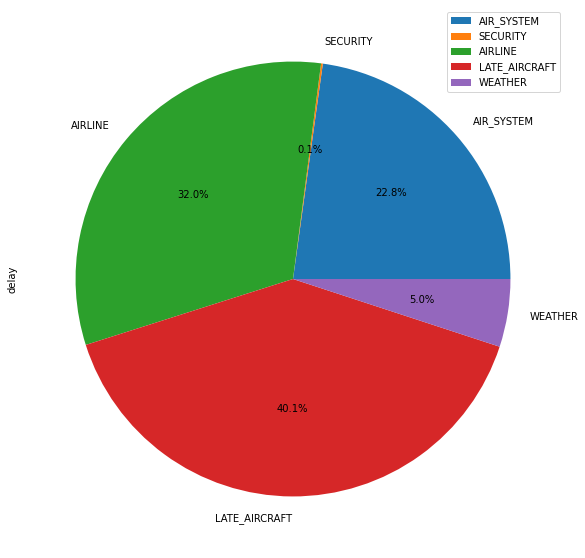

In [45]:
query = """\
    SELECT SUM(AIR_SYSTEM_DELAY) AS AIR_SYSTEM,
    SUM(SECURITY_DELAY) AS SECURITY,
    SUM(AIRLINE_DELAY) AS AIRLINE,
    SUM(LATE_AIRCRAFT_DELAY) AS LATE_AIRCRAFT,
    SUM(WEATHER_DELAY) AS WEATHER
    FROM DELAYS
    """
cummulative_delays = run_query(query)
cummulative_delays = cummulative_delays.T.rename(columns={0:'delay'})
plot = cummulative_delays.plot.pie(y='delay', figsize=(10, 10), autopct='%1.1f%%')

### 2. Region

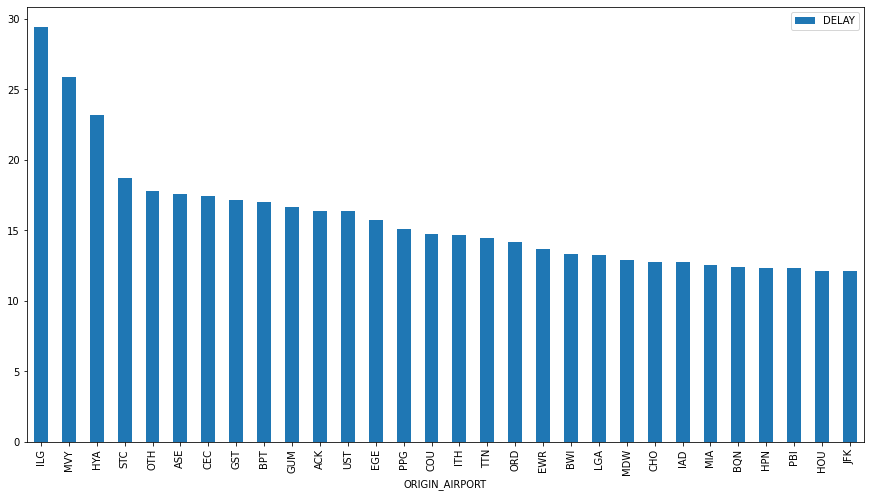

In [47]:
query = """\
    SELECT origin_airport, AVG(departure_delay) AS delay
    FROM delays
    GROUP BY origin_airport
    ORDER BY delay DESC
    FETCH FIRST 30 ROWS ONLY
    """
airport_delays = run_query(query)
airport_delays.plot(kind="bar", x="ORIGIN_AIRPORT", y="DELAY", figsize=(15,8));

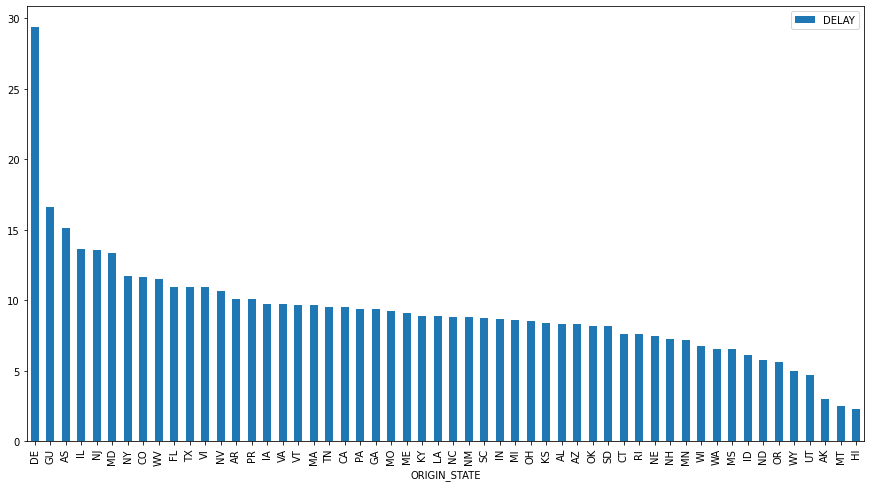

In [48]:
query = """\
    SELECT origin_state, AVG(departure_delay) AS delay
    FROM delays JOIN flight USING(flight_id)
    GROUP BY origin_state
    ORDER BY delay DESC
    """
state_delays = run_query(query)
state_delays.plot(kind="bar", x="ORIGIN_STATE", y="DELAY", figsize=(15,8));

### 3. Wetter

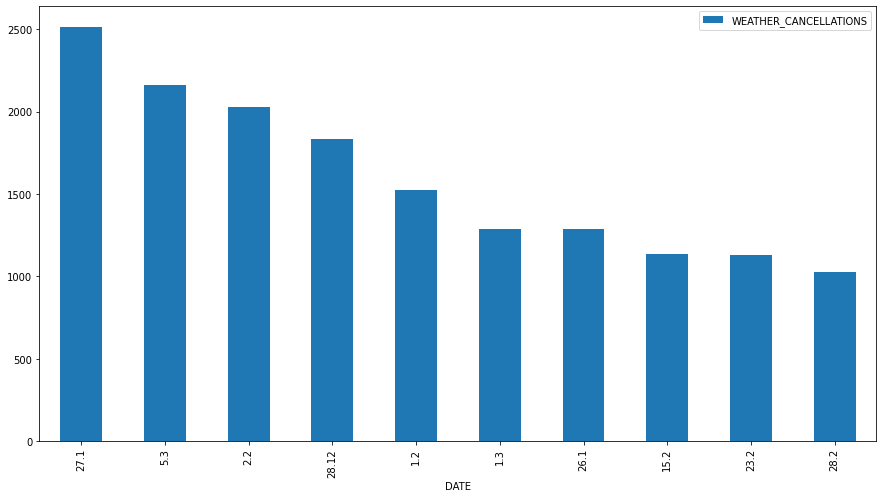

In [118]:
query = """\
    SELECT month, day, SUM(cancelled) AS weather_cancellations
    FROM delays
    WHERE cancellation_reason = 'B'
    GROUP BY month, day
    ORDER BY weather_cancellations DESC
    FETCH FIRST 10 ROWS ONLY
    """
weather_cancellation_days = run_query(query)
weather_cancellation_days['DATE'] = weather_cancellation_days['DAY'].astype(str) + '.' + weather_cancellation_days['MONTH'].astype(str)
weather_cancellation_days.plot(kind="bar", x="DATE", y="WEATHER_CANCELLATIONS", figsize=(15,8));

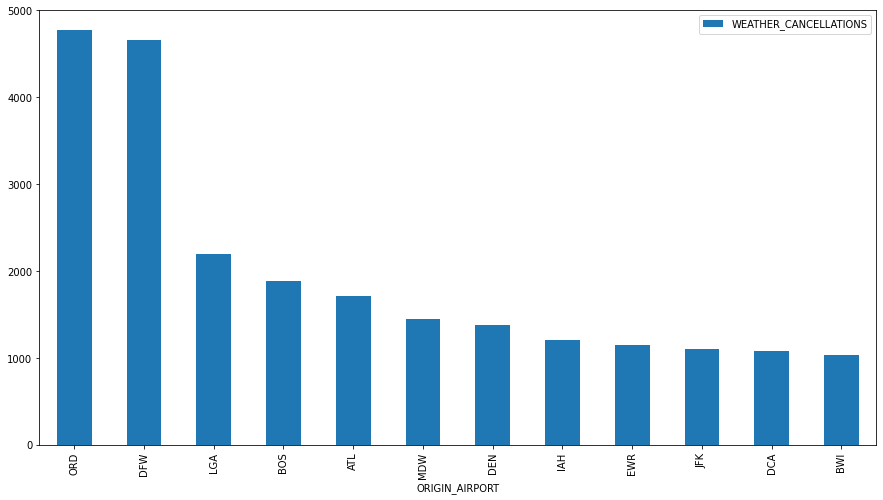

In [106]:
query = """\
    SELECT origin_airport, SUM(cancelled) AS weather_cancellations
    FROM delays
    WHERE cancellation_reason = 'B'
    GROUP BY origin_airport
    HAVING SUM(cancelled) > 1000
    ORDER BY weather_cancellations DESC
    """
weather_cancellation_airports = run_query(query)
weather_cancellation_airports.plot(kind="bar", x="ORIGIN_AIRPORT", y="WEATHER_CANCELLATIONS", figsize=(15,8));

### 4. Beste Zeit

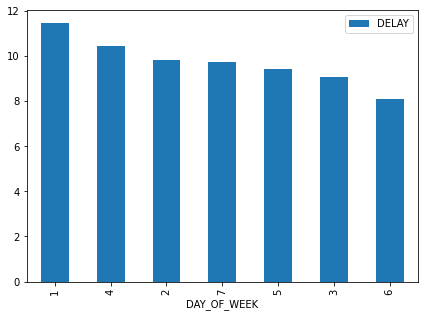

In [51]:
query = """\
    SELECT day_of_week, AVG(departure_delay) AS delay
    FROM delays JOIN time USING(day, month, year)
    GROUP BY day_of_week
    ORDER BY delay DESC
    """
day_of_week_delays = run_query(query)
day_of_week_delays.plot(kind="bar", x="DAY_OF_WEEK", y="DELAY", figsize=(7,5));

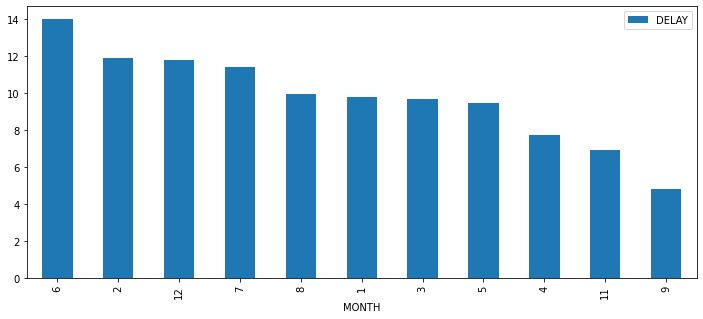

In [52]:
query = """\
    SELECT month, AVG(departure_delay) AS delay
    FROM delays
    GROUP BY month
    ORDER BY delay DESC
    """
month_delays = run_query(query)
month_delays.plot(kind="bar", x="MONTH", y="DELAY", figsize=(12,5));

### 5. Fluglinien

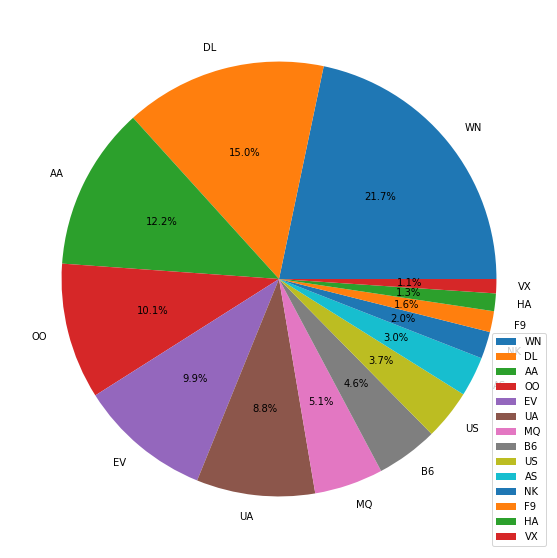

In [42]:
query = """\
    SELECT airline_iata, COUNT(*) AS n_flights
    FROM delays
    GROUP BY airline_iata
    ORDER BY n_flights DESC
    """
airline_activity = run_query(query).set_index('AIRLINE_IATA')
plot = airline_activity.plot.pie(y='N_FLIGHTS', figsize=(10, 10), autopct='%1.1f%%')

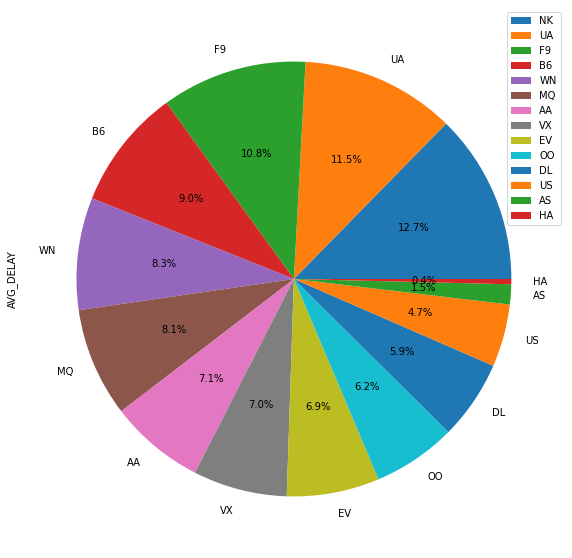

In [53]:
query = """\
    SELECT airline_iata, AVG(departure_delay) AS avg_delay
    FROM delays
    GROUP BY airline_iata
    ORDER BY avg_delay DESC
    """
avg_airline_delay = run_query(query).set_index('AIRLINE_IATA')
plot = avg_airline_delay.plot.pie(y='AVG_DELAY', figsize=(10, 10), autopct='%1.1f%%')

### 6. Beliebte Flüge

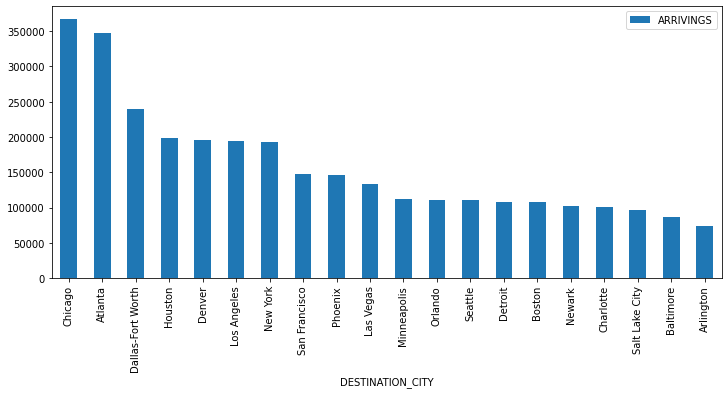

In [75]:
query = """\
    SELECT destination_city, COUNT(*) AS arrivings
    FROM delays JOIN flight USING(flight_id)
    GROUP BY destination_city
    ORDER BY arrivings DESC
    FETCH FIRST 20 ROWS ONLY
    """
travel_hotspots = run_query(query)
plot = travel_hotspots.plot(kind="bar", x="DESTINATION_CITY", y="ARRIVINGS", figsize=(12,5));

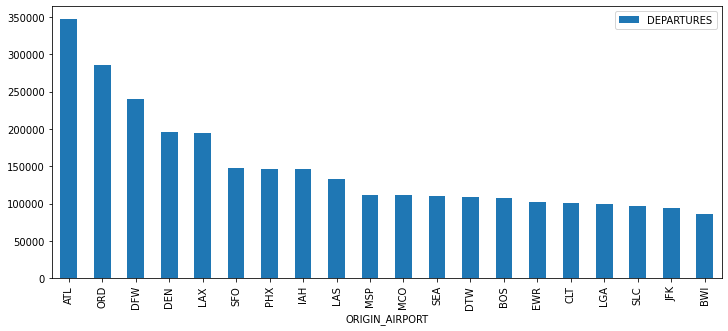

In [77]:
query = """\
    SELECT origin_airport, COUNT(*) AS departures
    FROM delays
    GROUP BY origin_airport
    ORDER BY departures DESC
    FETCH FIRST 20 ROWS ONLY
    """
airport_departures = run_query(query)
plot = airport_departures.plot(kind="bar", x="ORIGIN_AIRPORT", y="DEPARTURES", figsize=(12,5));

### 7. Viele Flughäfen


In [97]:
query = """\
    SELECT origin_city as city
    FROM flight
    GROUP BY origin_city
    HAVING COUNT(DISTINCT origin_airport) > 1
    """
multi_airport_cities = run_query(query)
multi_airport_cities

,CITY
0,Columbia
1,Portland
2,Jacksonville
3,San Diego
4,Springfield
5,New York
6,Rochester
7,Jackson
8,Chicago
9,Albany


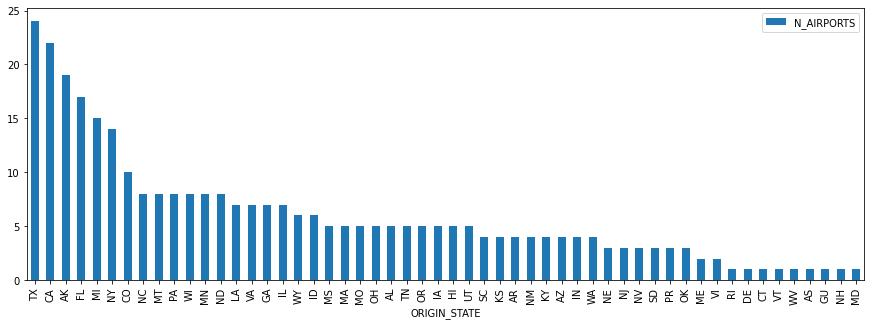

In [108]:
query = """\
    SELECT origin_state, COUNT(DISTINCT origin_airport) AS n_airports
    FROM flight
    GROUP BY origin_state
    ORDER BY n_airports DESC
    """
state_airports = run_query(query)
plot = state_airports.plot(kind="bar", x="ORIGIN_STATE", y="N_AIRPORTS", figsize=(15,5));

### 8. Beliebte Flugrouten

In [72]:
query = """\
    SELECT origin_airport, destination_airport
    FROM delays
    GROUP BY origin_airport, destination_airport
    HAVING COUNT(DISTINCT airline_iata) >= (SELECT COUNT(*)/2 FROM airline)
    """
popular_routes = run_query(query)

In [73]:
popular_routes['value'] = 1
new = pd.pivot_table(popular_routes, values='value', index=['ORIGIN_AIRPORT'], columns=['DESTINATION_AIRPORT'])
new.fillna(0).style.background_gradient(cmap='Blues')

DESTINATION_AIRPORT,ATL,DEN,LAS,LAX,MSP,ORD,PHL,PHX,SEA
ORIGIN_AIRPORT,,,,,,,,,
ATL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
DEN,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
LAS,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
LAX,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
MSP,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
ORD,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
PHL,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
PHX,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
SEA,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000


### 9. Analyse: Verspätungen

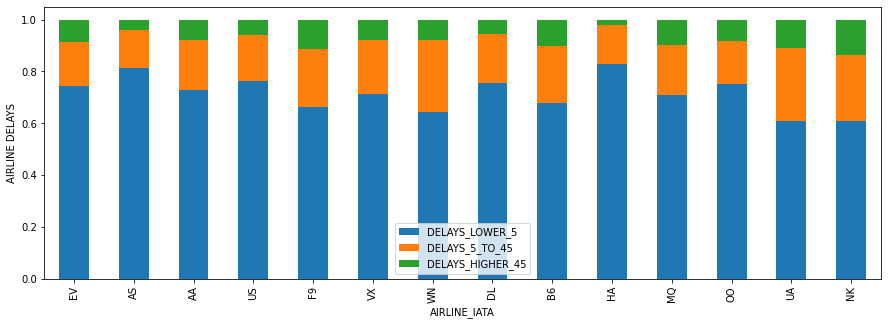

In [39]:
query = """\
    SELECT airline_iata, 
    COUNT(CASE WHEN departure_delay < 5 THEN 1 END) / COUNT(departure_delay) as delays_lower_5,
    COUNT(CASE WHEN (departure_delay >= 5 AND departure_delay <= 45) THEN 1 END) / COUNT(departure_delay) as delays_5_to_45,
    COUNT(CASE WHEN departure_delay > 45 THEN 1 END) / COUNT(departure_delay) as delays_higher_45
    FROM delays
    GROUP BY airline_iata
    """
airline_delays = run_query(query).set_index('AIRLINE_IATA')
plot = airline_delays.plot(kind="bar", stacked=True, figsize=(15,5), ylabel="AIRLINE DELAYS");

### 10. Analytische Analyse

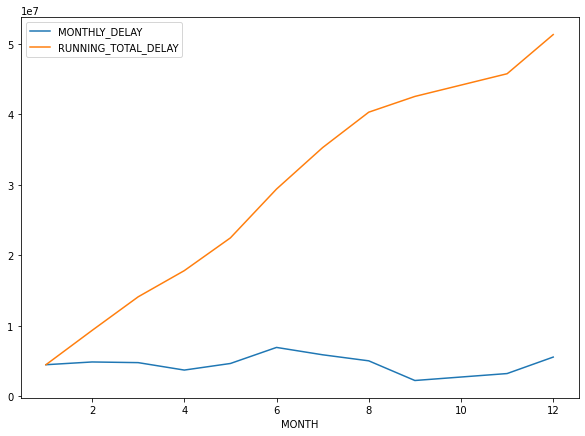

In [56]:
query = """\
        WITH sums AS (
            SELECT month, SUM(departure_delay) AS monthly_delay
            FROM delays
            GROUP BY month
        ) SELECT month, monthly_delay, SUM (monthly_delay) OVER (ORDER BY month) AS running_total_delay
        FROM sums
        """
monthly_delays = run_query(query).set_index('MONTH')
plot = monthly_delays.plot(figsize=(10,7));